In [2]:
library(openxlsx)

In [159]:
df <- read.xlsx("/Users/masanoritakahashi/Documents/講義/ゼミ/M2/空間生存時間/COVID-19/data/data_covid_fix_name.xlsx")

In [160]:
df <- na.omit(df)
# index reset
rownames(df) <- 1:nrow(df)
head(df)

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,2866376,60.319,13364.155,6996524,7.84,8.005411,7.67,70,74.3,1,108641,303.14
2,Algeria,42228429,72.629,15481.788,9108277,4.99,5.201489,4.77,58,12.0,1,80272,6442.44
3,Angola,30809762,65.514,6452.355,10490120,5.40,5.979936,4.83,83,17.9,1,303691,76.94
4,Argentina,44494502,91.870,20610.569,19025624,6.86,8.044600,5.67,65,74.9,1,92122,1516.63
5,Australia,24992369,86.012,51663.365,7608913,8.62,9.160533,8.07,26,97.3,1,1347,75667.65
6,Austria,8847037,58.297,55454.689,7103537,8.48,9.245685,7.71,58,73.2,1,80272,12935.50


In [161]:
data = df[,c(2,3,4,5,7,8,10,13)]
head(data)

,pop,urb,gdp,dist,pf,ef,detection,air
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2866376,60.319,13364.155,6996524,8.005411,7.67,74.3,303.14
2,42228429,72.629,15481.788,9108277,5.201489,4.77,12.0,6442.44
3,30809762,65.514,6452.355,10490120,5.979936,4.83,17.9,76.94
4,44494502,91.870,20610.569,19025624,8.044600,5.67,74.9,1516.63
5,24992369,86.012,51663.365,7608913,9.160533,8.07,97.3,75667.65
6,8847037,58.297,55454.689,7103537,9.245685,7.71,73.2,12935.50


In [162]:
# データ型の構造
str(data)

'data.frame':	150 obs. of  8 variables:
 $ pop      : num  2866376 42228429 30809762 44494502 24992369 ...
 $ urb      : num  60.3 72.6 65.5 91.9 86 ...
 $ gdp      : num  13364 15482 6452 20611 51663 ...
 $ dist     : num  6996524 9108277 10490120 19025624 7608913 ...
 $ pf       : num  8.01 5.2 5.98 8.04 9.16 ...
 $ ef       : num  7.67 4.77 4.83 5.67 8.07 7.71 6.34 7.25 7.35 6.18 ...
 $ detection: num  74.3 12 17.9 74.9 97.3 73.2 45 21.8 45.8 50.9 ...
 $ air      : num  303.1 6442.4 76.9 1516.6 75667.6 ...


In [163]:
nrow(data)

[1] 150

# 階層クラスタリング
- hclust(d, method = "使用メソッド")  

|方法|引数methodで設定する文字列|
| ------ | ------ |
|最短距離法（単連結法）|single|
|最長距離法（完全連結法）|	complete|
|群平均法|average|
|重心法|centroid|
|メディアン法|median|
|McQuitty 法|mcquitty|
|ウォード法（最小分散法）|ward.D2|

In [164]:
data = df[,c(2,3,4,5,7,8,10,13)]
#data["pop"] = log(data["pop"])

# 標準化
data_scale = scale(data)

In [165]:
# 非類似度（距離）を計算
# ユークリッド距離を求める
distance <- dist(data_scale) #ユークリッド距離を求める

In [166]:
round(distance)

     1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
2    5                                                                        
3    4  1                                                                     
4    4  4  4                                                                  
5    3  6  6  4                                                               
6    2  5  5  4  2                                                            
7    2  3  3  4  4  3                                                         
8    3  4  3  3  4  3  3                                                      
9    3  4  4  5  4  3  2  3                                                   
10   3  4  3  6  5  4  2  5  4                                                
11   3  3  3  4  4  3  1  2  2  3                                             
12   3  5  5  4  2  2  4  3  2  5  3                                          
13   3  3  3  4  5  4  3  2  4  4  3  4             

In [167]:
# 樹形図作成
hc <- hclust(distance, "ward.D2")

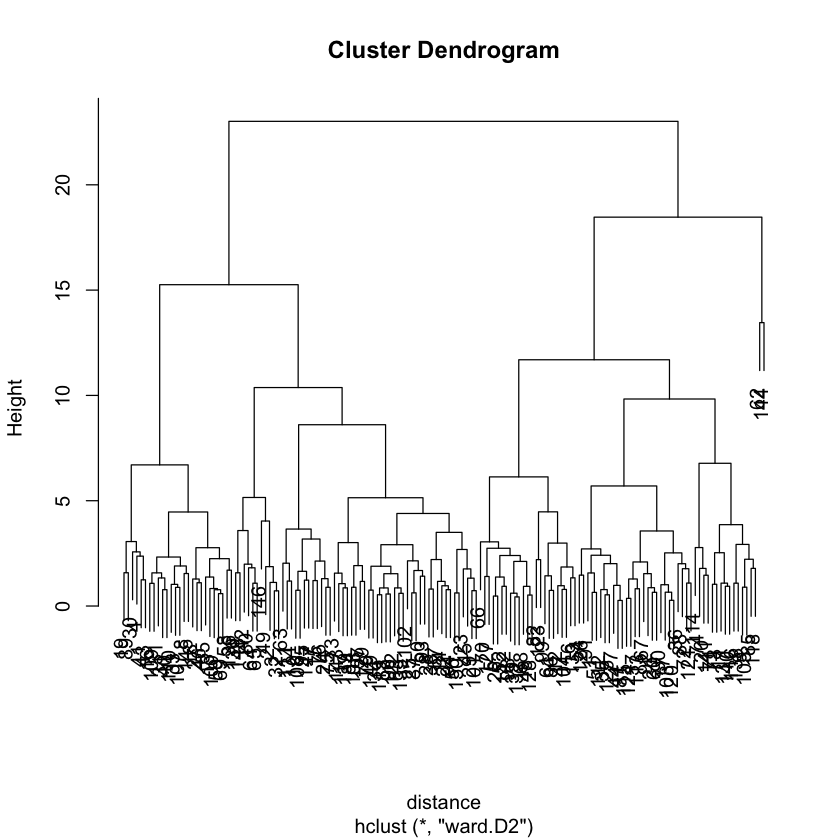

In [168]:
plot(hc)

### データの分割  
- cutree(tree, k = NULL, h = NULL)  

|引数|	説明|
| ------ | ------ |
|tree|	関数 hclust で作成された樹形図|
|k|	分割するクラスター数|
|h|	樹形図を分割する高さ|

In [169]:
result <- cutree(hc,k=3)

In [170]:
result

1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   2   2   2   1   1   2   2   1   2   1   1   2   2   2   2   1   2   2   1 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  1   2   2   2   2   1   2   2   2   2   2   2   2   2   1   1   1   2   1   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   2   1   2   2   1   1   2   2   1   1   2   1   2   2   2   2   2   1 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  1   3   2   2   2   1   1   1   2   1   1   1   2   1   2   2   1   1   2   2 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   1   2   2   1   1   2   1   2   1   1   1   2   2   2   2   2   1   1   2 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  2   2   1   1   1   2   2   2   2   2   2   1   1   1   1   1   2   1   2   1 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  1   2   1   1   1   1   1   1   2   2   2   1   1   2   2   2   1   1   2   1 
141 142 143 144 145 146 147 148 149 150 
  1   1   2   3   2   2   2   2   2   2

# 非階層クラスタリング  
- kmeans(x, centers, iter.max = 10, nstart = 1,algorithm = c("Hartigan-Wong", "Lloyd", "Forgy", "MacQueen"))

|引数|	説明|
| ----- | ----- |
|x|	データ|
|centers|	クラスターの数、または クラスターの中心． クラスタの数であれば、 クラスターの中心はランダムに与えられる|
|iter.max|	処理の繰り返し回数　の最大値|
|nstart|	ランダムに初期値を設定する時のパラメータ|
|algorithm|	計算アルゴリズム． ("Hartigan-Wong", "Lloyd", "Forgy", "MacQueen") . デフォルトは "Hartigan-Wong"|

In [171]:
data = df[,c(2,3,4,5,7,8,10,13)]
#data["pop"] = log(data["pop"])

# 標準化
data_scale = scale(data)

In [172]:
km <- kmeans(data,3)
result <- km$cluster

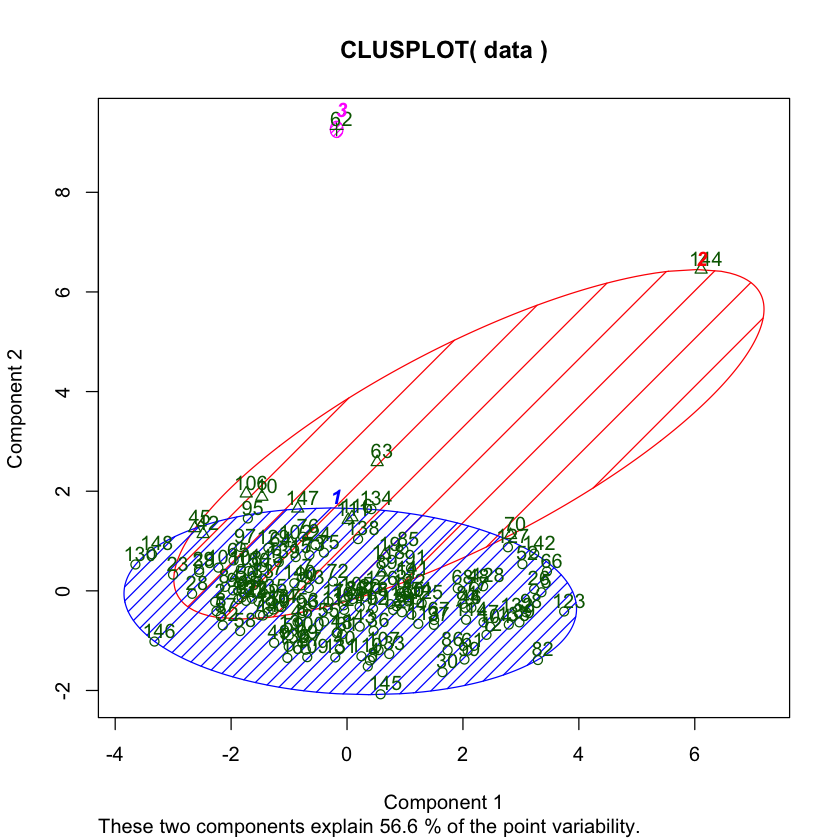

In [173]:
library(cluster)
clusplot(data, km$cluster, color=TRUE, shade=TRUE, labels=2, lines=0)

In [151]:
#data["cluster"] = km$cluster 
km$cluster 

1   2   3   4   6   7   8   9  10  11  13  14  15  16  17  18  19  20  21  22 
  3   3   3   3   3   3   3   3   3   1   3   3   3   3   3   3   3   3   1   3 
 23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
 43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  62  63 
  3   1   3   3   1   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83 
  3   2   1   3   3   3   3   3   3   1   3   3   3   3   3   3   3   3   3   3 
 84  85  86  87  88  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 
  3   3   3   3   3   3   3   3   1   3   3   3   3   3   3   3   3   3   3   3 
105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 
  3   1   3   3   3   1   3   3   3   3   1   3   3   3   3   1   3   3   3   3 
125 126 127 128 129 130 131 132 133 134 135 136 137 138 140 141 142 143 144 145 
  3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3   3 
146 147 148 149 150 151 152 153 154 155 
  3   3   3   1   3   3   1   3   3   3

### クラスター番号3を確認  

In [69]:
km$cluster[km$cluster ==3]

65 
 3

In [72]:
data[data["cluster"]==3, ]

,pop,urb,gdp,dist,pf,ef,detection,air,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
65,1352617328,34.03,7762.882,2777278,6.368844,6.91,47.4,164035.6,3


In [73]:
df[df["pop"] == 1352617328, ]

,country,pop,urb,gdp,dist,hf,pf,ef,date_first,detection,status,cumul,air
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
65,India,1352617328,34.03,7762.882,2777278,6.64,6.368844,6.91,31,47.4,1,7815,164035.6
